<a href="https://colab.research.google.com/github/KBGIBN/L23.KHCL.N01/blob/main/Assignment/3/DoiMoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

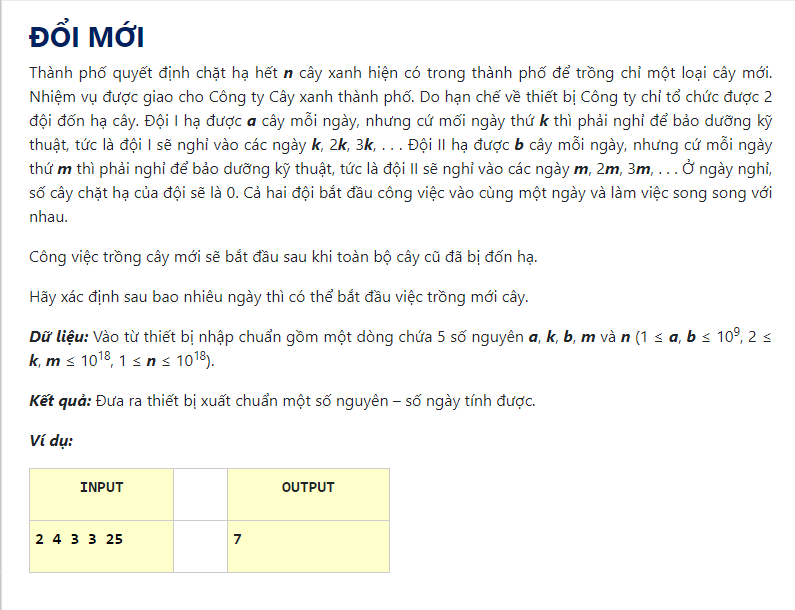

#ĐỔI MỚI
#1. Abstraction
* Với các giá trị cho trước là a, k, b, m, n, tìm X sao cho: $X*(a+b) - a*(X//k) - b*(X//m) >= n$

#2. Pattern recognition
* Bài toán **Đổi Mới** này yêu cầu chúng ta phải xét xem mỗi ngày chặt được bao nhiêu cây, nên em chọn hướng dùng **thuật toán Brute Force** để xử lý chính xác nhất có thể.

#3. Algorithm design
##3.1. Brute Force thông thường
Cho a, k, b, m, n:
* **Bước 1**: SoCayDaChat (Số cây đã chặt) = 0; SoNgay (Số ngày làm việc) = 0.
* **Bước 2**:
   * Nếu SoCayDaChat >= n: Chuyển đến **Bước 4**.
   * Nếu SoCayDaChat < n: Tiếp tục đến **Bước 3**.
* **Bước 3**:
   * SoNgay += 1
   * Nếu SoNgay % k != 0: SoCayDaChat += a
   * Nếu SoNgay % m != 0: SoCayDaChat += b
   * Chuyển sang **Bước 2**
* **Bước 4**: Trả về kết quả là SoNgay, kết thúc thuật toán.

**Độ phức tạp thuật toán:**
   * Best case: **a + b = n**, độ phức tạp là O(1).
   * O$(n/(a+b))$ với các trường hợp còn lại.

Tuy nhiên, vấn đề gặp phải khi sử dụng thuật toán Brute Force thông thường như trên đó là nó không thể xử lý được những dữ liệu lớn, không hiệu quả về thời gian và không gian. Vì vậy em quyết định cải tiến thuật toán này.

##3.2. Brute Force cải tiến

**Ý tưởng**: Ở đây, thay vì bắt đầu đếm từ ngày đầu như Brute Force thông thường thì em sẽ thực hiện tính toán với các dữ liệu đã cho để đưa SoNgay mà chúng ta xét đến gần nhất với kết quả, sau đó lấy đó làm điểm xuất phát để xét đến các ngày còn lại, cụ thể như sau:

Với a, k, b, m, n cho trước:
* **Bước 1**:
   * SoNgay = n // (a+b)
   * SoCayDaChat = SoNgay.(a+b) - a.(SoNgay // k) - b.(SoNgay // m)
   * SoCayConLai = n - SoCayDaChat

* **Bước 2**: Nếu SoCayConLai < (a + b): Chuyển đến **Bước 4**
* **Bước 3**:
   * SoNgay += SoCayConLai // (a + b)
   * SoCayDaChat = SoNgay.(a+b) - a.(SoNgay // k) - b.(SoNgay // m)
   * SoCayConLai = n - SoCayDaChat
   * Quay lại **Bước 2**.
  
* **Bước 4**: Nếu SoCayDaChat >= n: Chuyển sang **Bước 6**
* **Bước 5**:
   * SoNgay += 1
   * Nếu SoNgay % k != 0: SoCayDaChat += a
   * Nếu SoNgay % m != 0: SoCayDaChat += b
   * Quay lại **Bước 4**.

* **Bước 6**: Trả về kết quả là SoNgay, kết thúc thuật toán.

**Độ phức tạp thuật toán:**
* Best case: **a + b = n**, độ phức tạp là O(1).
* O($log_{a+b}n$) với các trường hợp còn lại.

# 4. Code
##4.1. Brute Force thông thường


In [1]:
def DoiMoi(a,k,b,m,n):
    SoNgay = 0
    SoCayDaChat = 0

    while SoCayDaChat < n:
        SoNgay += 1
        if SoNgay % k != 0:
            SoCayDaChat += a
        if SoNgay % m != 0:
            SoCayDaChat += b
    
    return SoNgay

a,k,b,m,n = map(int,input().split())
print(int(DoiMoi(a,k,b,m,n)))

2 4 3 3 25
7


## 4.2. Brute Force cải tiến

In [2]:
def DoiMoi(a, k, b, m, n):
    SoNgay = n // (a+b)
    SoCayDaChat = SoNgay*(a+b) - a*(SoNgay//k) - b*(SoNgay//m)
    SoCayConLai = n - SoCayDaChat
    
    while SoCayConLai >= (a+b):
        SoNgay += SoCayConLai // (a+b)
        SoCayDaChat = SoNgay*(a+b) - a*(SoNgay//k) - b*(SoNgay//m)
        SoCayConLai = n - SoCayDaChat
    
    while SoCayDaChat < n:
        if (SoNgay // k) != 0:
            SoCayDaChat += a
        if (SoNgay // m) != 0:
            SoCayDaChat += b
        SoNgay += 1
    
    return SoNgay

a,k,b,m,n = map(int,input().split())
print(int(DoiMoi(a,k,b,m,n)))

2 4 3 3 25
7
